In [1]:
#Importing basic packages/modules

import time
import numpy as np
import pandas as pd
from sklearn import metrics
import joblib

In [2]:
data = pd.read_excel('data/heart disease.xlsx')

positive = data.loc[data['target'] == 1]
negative = data.loc[data['target'] == 0]

X = data.iloc[:, 0:14]
Y = data.iloc[:, -1]

In [3]:
data.head()

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,target
0,1,39,1,8,0,0,1,0,236,106.0,70.0,26.0,76,82,1
1,0,46,1,9,0,0,1,0,236,121.0,81.0,26.0,140,82,1
2,1,48,1,9,1,0,1,0,236,127.5,80.0,26.0,130,82,1
3,0,61,1,60,1,0,1,0,236,150.0,95.0,26.0,125,82,1
4,0,46,1,60,0,0,1,0,236,130.0,84.0,26.0,112,82,1


In [4]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.20)

In [5]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(xtrain, ytrain)
pred_rfc = RFC.predict(xtest)
acc_rfc = metrics.accuracy_score(ytest, pred_rfc)*100
joblib.dump(RFC, 'models/Heart_RFC.pkl')

print('1. Using RandomForestClassifier Method')
print('Accuracy - {}'.format(acc_rfc))
print('Recall - {}'.format(metrics.recall_score(ytest, pred_rfc)))
print('Precision Score - {}'.format(metrics.precision_score(ytest, pred_rfc)))
print('Confusion matrix')
print(metrics.confusion_matrix(ytest, pred_rfc))

1. Using RandomForestClassifier Method
Accuracy - 100.0
Recall - 1.0
Precision Score - 1.0
Confusion matrix
[[134   0]
 [  0 124]]


In [6]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(xtrain, ytrain)
pred_gb = GB.predict(xtest)
acc_gb = metrics.accuracy_score(ytest, pred_gb)*100
joblib.dump(GB, 'models/Heart_GB.pkl')

print('2. Using Gradient Boosting Method')
print('Accuracy - {}'.format(acc_gb))
print('Recall - {}'.format(metrics.recall_score(ytest, pred_gb)))
print('Precision Score - {}'.format(metrics.precision_score(ytest, pred_gb)))
print('Confusion matrix')
print(metrics.confusion_matrix(ytest, pred_gb))

2. Using Gradient Boosting Method
Accuracy - 100.0
Recall - 1.0
Precision Score - 1.0
Confusion matrix
[[134   0]
 [  0 124]]


In [7]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xtrain, ytrain)
pred_lr = LR.predict(xtest)
acc_lr = metrics.accuracy_score(ytest, pred_lr)*100
joblib.dump(LR, 'models/Heart_LR.pkl')

print('3. Using Logistic Regression Method')
print('Accuracy - {}'.format(acc_lr))
print('Recall - {}'.format(metrics.recall_score(ytest, pred_lr)))
print('Precision Score - {}'.format(metrics.precision_score(ytest, pred_lr)))
print('Confusion matrix')
print(metrics.confusion_matrix(ytest, pred_lr))

3. Using Logistic Regression Method
Accuracy - 98.83720930232558
Recall - 0.9758064516129032
Precision Score - 1.0
Confusion matrix
[[134   0]
 [  3 121]]


C:\Users\C Soujanya Joshi\Anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [8]:
from sklearn import svm
SVM = svm.LinearSVC(loss='hinge')
SVM.fit(xtrain, ytrain)
pred_svm = SVM.predict(xtest)
acc_svm = metrics.accuracy_score(ytest, pred_svm)*100
joblib.dump(SVM, 'models/Heart_SVM.pkl')

print('4. Using SVM Method')
print('Accuracy - {}'.format(acc_svm))
print('Recall - {}'.format(metrics.recall_score(ytest, pred_svm)))
print('Precision Score - {}'.format(metrics.precision_score(ytest, pred_svm)))
print('Confusion matrix')
print(metrics.confusion_matrix(ytest, pred_svm))

4. Using SVM Method
Accuracy - 98.83720930232558
Recall - 0.9758064516129032
Precision Score - 1.0
Confusion matrix
[[134   0]
 [  3 121]]


C:\Users\C Soujanya Joshi\Anaconda3\anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [9]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 2)
KNN.fit(xtrain, ytrain)
pred_knn = KNN.predict(xtest)
acc_knn = metrics.accuracy_score(ytest, pred_knn)*100
joblib.dump(KNN, 'models/Heart_KNN.pkl')

print('5. Using KNN Method')
print('Accuracy - {}'.format(acc_knn))
print('Recall - {}'.format(metrics.recall_score(ytest, pred_knn)))
print('Precision Score - {}'.format(metrics.precision_score(ytest, pred_knn)))
print('Confusion matrix')
print(metrics.confusion_matrix(ytest, pred_knn))

5. Using KNN Method
Accuracy - 98.06201550387597
Recall - 0.9596774193548387
Precision Score - 1.0
Confusion matrix
[[134   0]
 [  5 119]]


In [10]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth=10, random_state=101, max_features=None, min_samples_leaf=10)
DT.fit(xtrain, ytrain)
pred_DT = DT.predict(xtest)
acc_DT = metrics.accuracy_score(ytest, pred_DT)*100
joblib.dump(DT, 'models/Heart_DT.pkl')

print('6. Using Decision Tree Method')
print('Accuracy - {}'.format(acc_DT))
print('Recall - {}'.format(metrics.recall_score(ytest, pred_DT)))
print('Precision Score - {}'.format(metrics.precision_score(ytest, pred_DT)))
print('Confusion matrix')
print(metrics.confusion_matrix(ytest, pred_DT))

6. Using Decision Tree Method
Accuracy - 100.0
Recall - 1.0
Precision Score - 1.0
Confusion matrix
[[134   0]
 [  0 124]]


In [21]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(64, 32, 1))
MLP.fit(xtrain, ytrain)
pred_MLP = MLP.predict(xtest)
acc_MLP = metrics.accuracy_score(ytest, pred_MLP)*100
joblib.dump(MLP, 'models/Heart_MLP.pkl')

print('8. Using MLP Method')
print('Accuracy - {}'.format(acc_MLP))
print('Recall - {}'.format(metrics.recall_score(ytest, pred_MLP)))
print('Precision Score - {}'.format(metrics.precision_score(ytest, pred_MLP)))
print('Confusion matrix')
print(metrics.confusion_matrix(ytest, pred_MLP))

8. Using MLP Method
Accuracy - 48.06201550387597
Recall - 1.0
Precision Score - 0.4806201550387597
Confusion matrix
[[  0 134]
 [  0 124]]


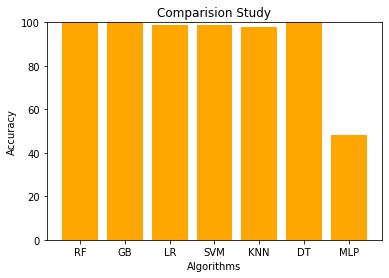

In [22]:
import matplotlib.pyplot as plt

#Defining labels and data
height = [acc_rfc, acc_gb, acc_lr, acc_svm , acc_knn, acc_DT, acc_MLP]
bars = ('RF', 'GB', 'LR', 'SVM', 'KNN', 'DT', 'MLP')
y_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(y_pos, height, color = (1.00, 0.65, 0.00, 1.0))
 
# Add Title and Axis names
plt.title('Comparision Study')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
 
# Limits for the Y axis
plt.ylim(0,100) 
# Create names
plt.xticks(y_pos, bars) 
#Save the graphic
plt.savefig('graphs/Comparision_Study')
# Show graphic
plt.show()